# BigMart Mini Project

### Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

We will handle this problem in a structured way. We will be following the table of content given below.

* Table of Content
* Problem Statement
* Hypothesis Generation
* Loading Packages and Data
* Data Structure and Content
* Exploratory Data Analysis
* Univariate Analysis
* Bivariate Analysis
* Missing Value Treatment
* Feature Engineering
* Encoding Categorical Variables
* Label Encoding
* One Hot Encoding
* PreProcessing Data
* Modeling
* Linear Regression
* Regularized Linear Regression
* RandomForest
* XGBoost
* Summary

Following is the link to explore the information related to each topic specifically.

https://shahyaseen71.gitbook.io/technocolabs-mini-project/your-task

### The Business Problem Exploring
The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

#### IMPORTING DIFFERENT LIBRARIES AS REQUIRED


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns 
from sklearn.metrics import r2_score

### Importing Dataset


In [38]:
df=pd.read_csv("Train.csv")
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [151]:
df.shape

(8523, 10)

### Filling Null Values 


In [39]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [40]:
df["Item_Weight"][:10]

0     9.300
1     5.920
2    17.500
3    19.200
4     8.930
5    10.395
6    13.650
7       NaN
8    16.200
9    19.200
Name: Item_Weight, dtype: float64

In [41]:
df["Outlet_Size"].isna().sum()

2410

In [42]:
df["Outlet_Size"][:10]

0    Medium
1    Medium
2    Medium
3       NaN
4      High
5    Medium
6      High
7    Medium
8       NaN
9       NaN
Name: Outlet_Size, dtype: object

In [43]:
df.Item_Weight=df.Item_Weight.fillna(df["Item_Weight"].mean())

In [44]:
df["Item_Weight"].isna().sum()

0

In [45]:
df["Item_Weight"][:10]

0     9.300000
1     5.920000
2    17.500000
3    19.200000
4     8.930000
5    10.395000
6    13.650000
7    12.857645
8    16.200000
9    19.200000
Name: Item_Weight, dtype: float64

In [46]:
df["Outlet_Size"].mode()[0]

'Medium'

In [47]:
df.Outlet_Size=df.Outlet_Size.fillna("Medium")

In [48]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Dataset Description

In [50]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Plotting of Numeric Features 

#### UNIVARIATE ANALYSIS

<Figure size 500x500 with 0 Axes>

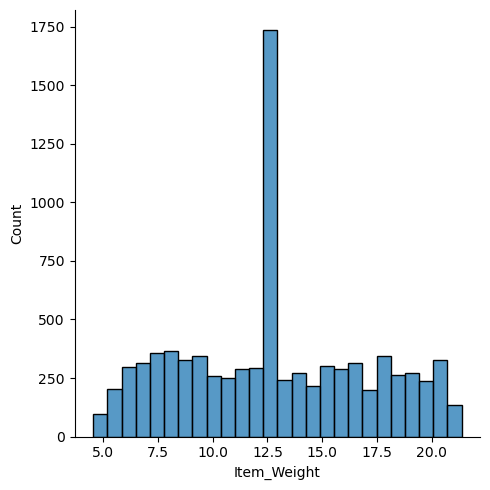

In [52]:
#PLOTTING GRAPHS FOR ITEM_WEIGHT

plt.figure(figsize=(5,5))
sns.displot(df["Item_Weight"])
plt.show()

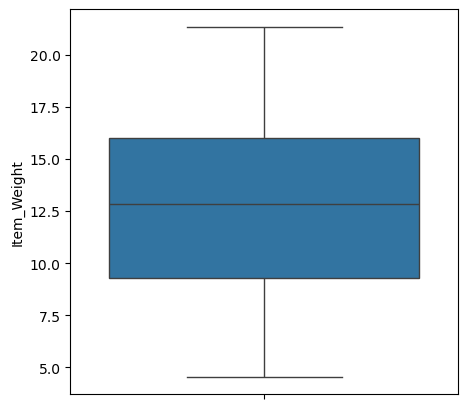

In [53]:
plt.figure(figsize=(5,5))
sns.boxplot(df["Item_Weight"])
plt.show()  #plotting boxplot to check the case of outliers

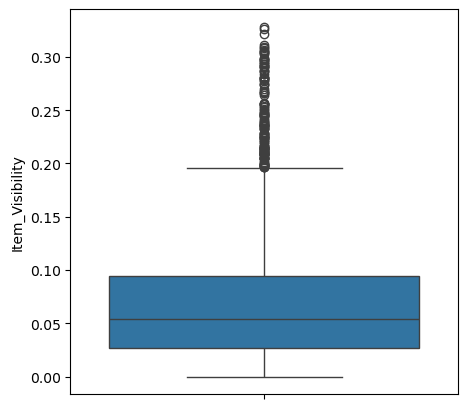

In [54]:
#PLOTTING GRAPHS FOR ITEM_VISIBILITY

plt.figure(figsize=(5,5))
sns.boxplot(df["Item_Visibility"])
plt.show()

In [55]:
np.where(df["Item_Visibility"]>0.20)

(array([  49,   83,  108,  174,  334,  434,  502,  521,  532,  680,  847,
         854,  966, 1159, 1225, 1272, 1291, 1311, 1324, 1434, 1496, 1501,
        1560, 1575, 1644, 1651, 1754, 1805, 1827, 1841, 1941, 2088, 2122,
        2251, 2324, 2336, 2403, 2439, 2445, 2586, 2613, 2728, 2855, 2895,
        3001, 3017, 3171, 3206, 3336, 3341, 3399, 3458, 3474, 3488, 3497,
        3540, 3750, 3767, 3811, 3884, 3993, 4006, 4175, 4192, 4219, 4350,
        4382, 4408, 4530, 4538, 4567, 4656, 4674, 4789, 4941, 4987, 5031,
        5050, 5083, 5150, 5154, 5287, 5366, 5374, 5445, 5634, 5732, 5734,
        5795, 5837, 5880, 5891, 5946, 6008, 6012, 6102, 6179, 6536, 6547,
        6576, 6622, 6670, 6674, 6786, 6833, 6903, 6926, 6953, 6966, 7005,
        7072, 7081, 7088, 7107, 7121, 7215, 7250, 7278, 7388, 7499, 7558,
        7603, 7639, 7744, 7866, 7949, 8194, 8215, 8273, 8292, 8345, 8371,
        8432, 8509], dtype=int64),)

#### Looking at the box plot, it seems that the variables "Item_Visibility", have outlier present in the variables. These outliers value needs to be teated and there are several ways of treating them:

* Drop the outlier value
* Replace the outlier value using the IQR

In [56]:
# Instead of dropping out values we will replace the outlier 

def outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    
    return lower_range, upper_range

In [57]:
lower_range, upper_range = outlier(df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']>upper_range,upper_range,df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']<lower_range,lower_range,df['Item_Visibility'])


* Boxplot After removing outlier

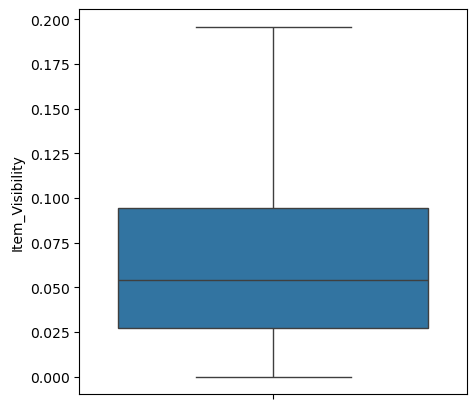

In [58]:
plt.figure(figsize=(5,5))
sns.boxplot(df["Item_Visibility"])
plt.show()

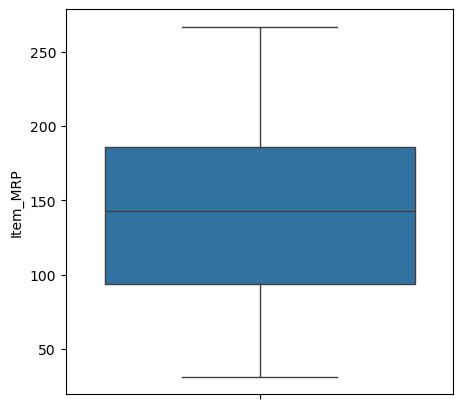

In [59]:
#PLOTTING GRAPHS FOR Item_MRP

plt.figure(figsize=(5,5))
sns.boxplot(df["Item_MRP"])
plt.show()

<Figure size 500x500 with 0 Axes>

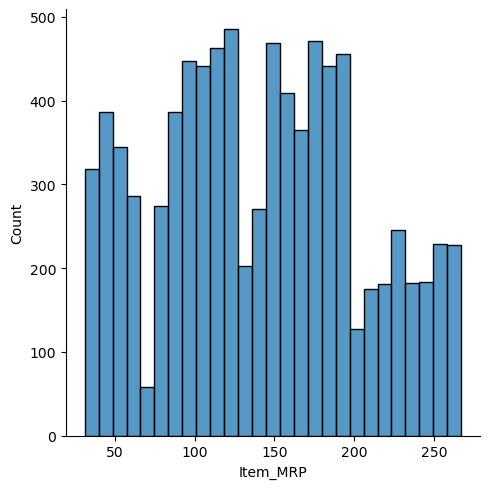

In [60]:
plt.figure(figsize=(5,5))
sns.displot(df["Item_MRP"])
plt.show()

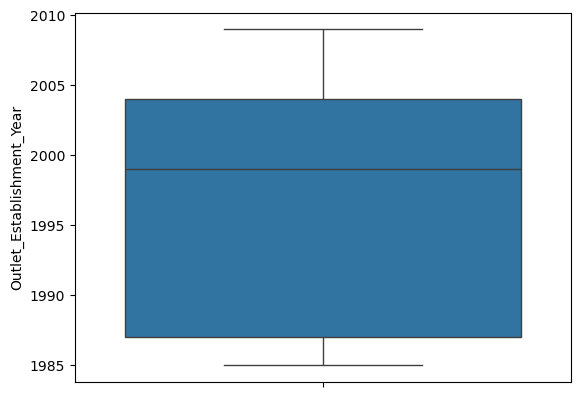

In [61]:
#PLOTTING GRAPHS FOR Outlet_Establishment_Year
sns.boxplot(df["Outlet_Establishment_Year"])
plt.show()

### Plot the Data

C:\Users\hp\AppData\Local\Temp\ipykernel_10428\985763681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)


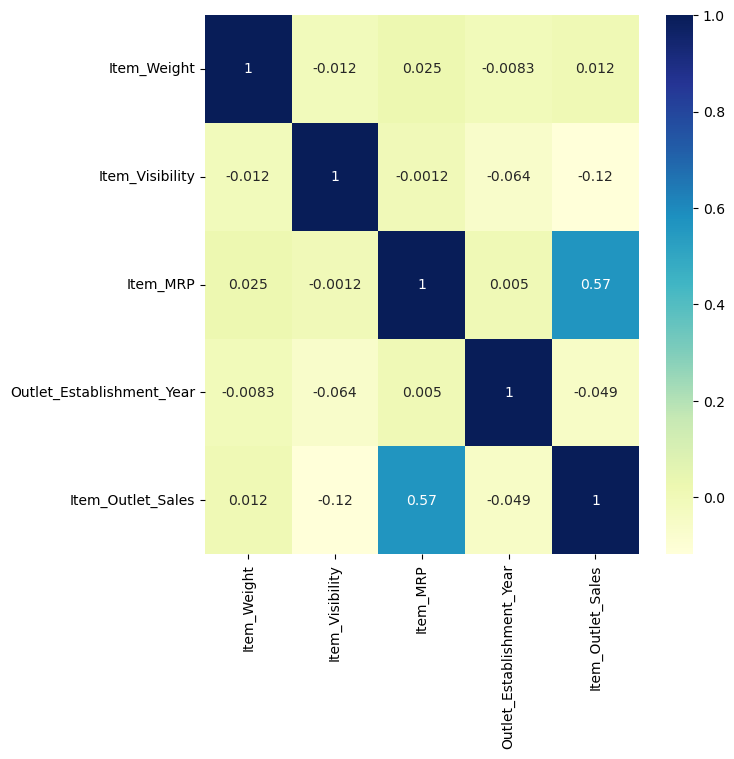

In [62]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

### Analysis using Countplot

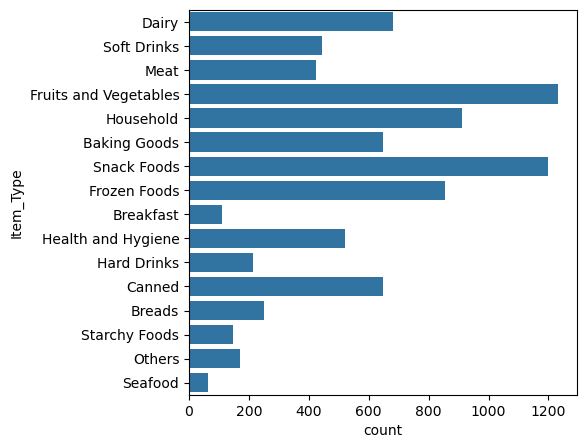

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(df["Item_Type"])
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Axes: xlabel='Item_Fat_Content', ylabel='count'>

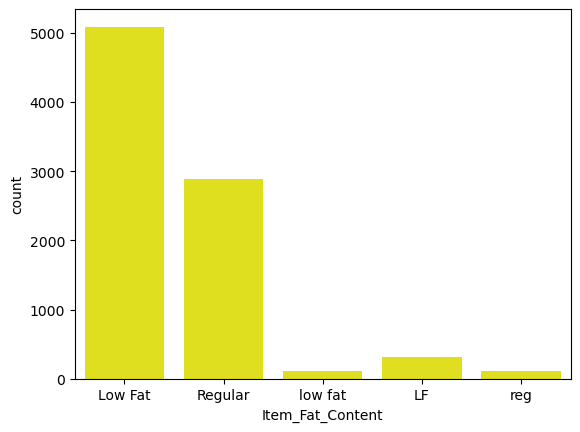

In [65]:
sns.countplot(x="Item_Fat_Content",data=df, color="Yellow")


<Axes: xlabel='Outlet_Size', ylabel='count'>

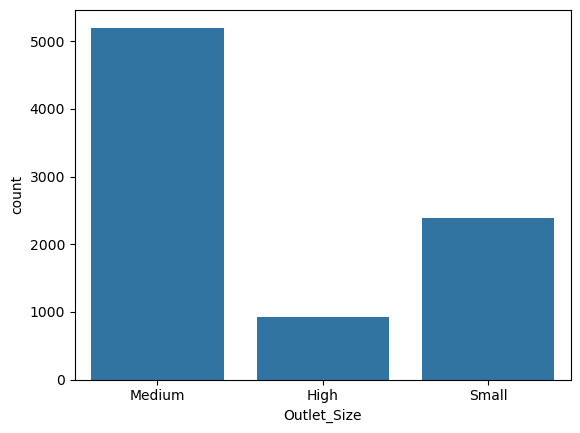

In [66]:
sns.countplot(x='Outlet_Size',data=df)

C:\Users\hp\AppData\Local\Temp\ipykernel_10428\244878538.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Type',data=df,palette=["#ff751a","#1a75ff","#2eb82e","#e6e600"])


<Axes: xlabel='Outlet_Type', ylabel='count'>

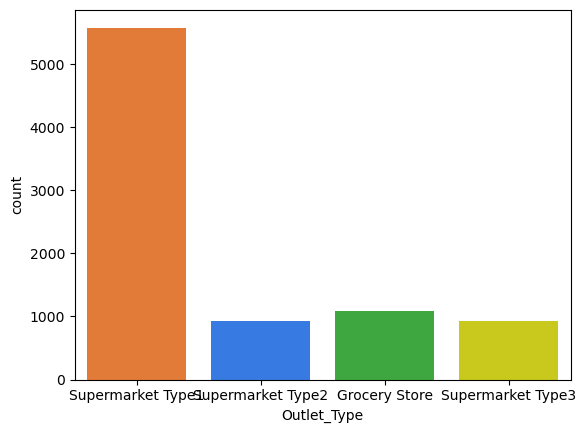

In [67]:
sns.countplot(x='Outlet_Type',data=df,palette=["#ff751a","#1a75ff","#2eb82e","#e6e600"])

### Bivariate Analysis 

* Analysis Between 'Item_MRP' and 'Item_Outlet_Sales'

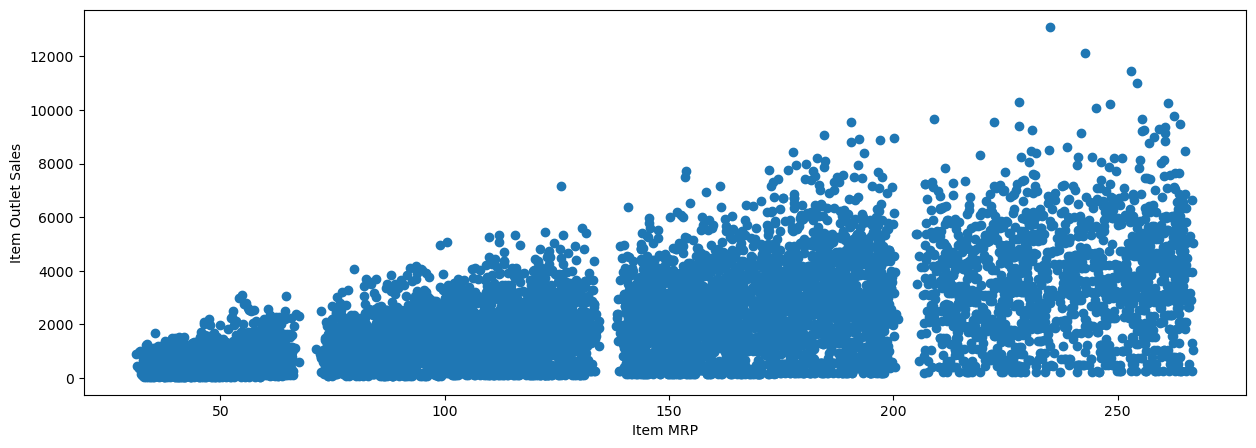

In [68]:
plt.figure(figsize=(15,5))
plt.scatter(df["Item_MRP"],df["Item_Outlet_Sales"])
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.show()

* Analysis Between 'Outlet_Establishment_Year' and 'Item_Outlet_Sales'

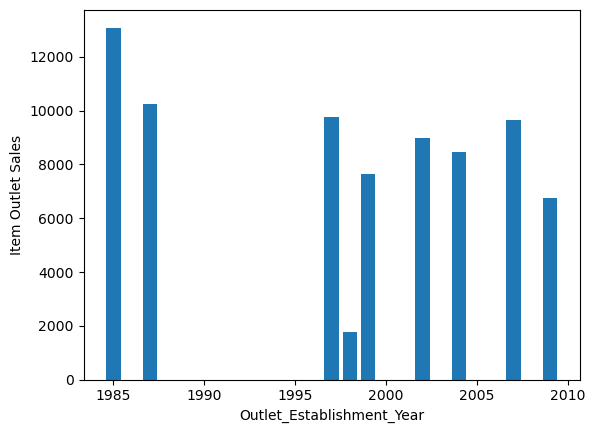

In [69]:
plt.bar(df['Outlet_Establishment_Year' ],df["Item_Outlet_Sales"])
plt.xlabel('Outlet_Establishment_Year' )
plt.ylabel("Item Outlet Sales")
plt.show()


* Analysis Between 'Outlet_Type' and 'Item_Outlet_Sales'

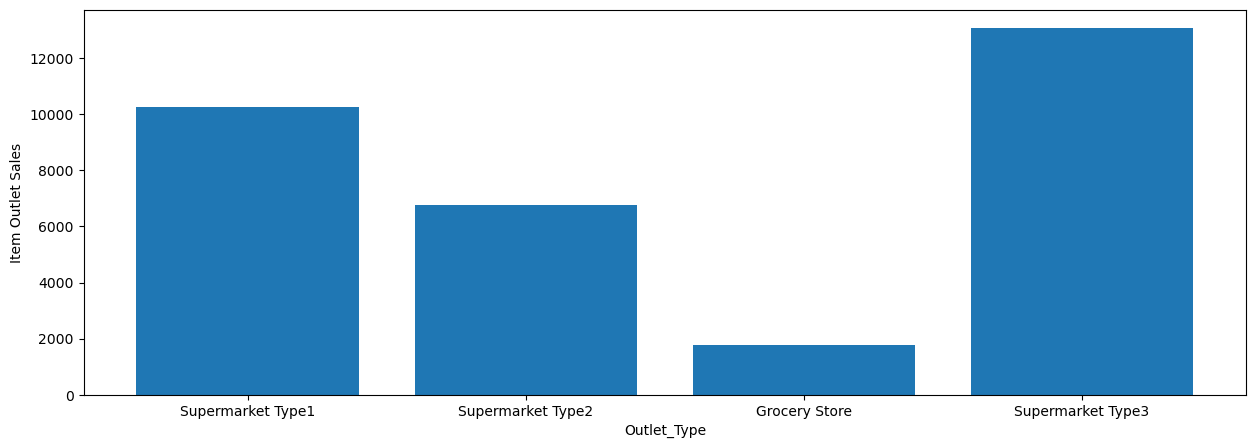

In [70]:
plt.figure(figsize=(15,5))
plt.bar(df['Outlet_Type' ],df["Item_Outlet_Sales"])
plt.xlabel('Outlet_Type' )
plt.ylabel("Item Outlet Sales")
plt.show()

### Data Pre-Processing

In [71]:
from sklearn.preprocessing import MinMaxScaler
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [72]:
df=df.replace({"Item_Fat_Content":{"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}})

In [73]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Label Encoding

In [74]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df["Outlet_Size"][3]

'Medium'

In [75]:
df.select_dtypes(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [76]:
df["Item_Identifier"]=encoder.fit_transform(df["Item_Identifier"])
df["Item_Fat_Content"]=encoder.fit_transform(df["Item_Fat_Content"])
df["Item_Type"]=encoder.fit_transform(df["Item_Type"])
df["Outlet_Identifier"]=encoder.fit_transform(df["Outlet_Identifier"])
df["Outlet_Size"]=encoder.fit_transform(df["Outlet_Size"])
df["Outlet_Location_Type"]=encoder.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Type"]=encoder.fit_transform(df["Outlet_Type"])

In [77]:
df.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)


### Scaling 


In [78]:
minmax_scale=MinMaxScaler()
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [79]:
scale_columns=["Item_Weight","Item_Visibility","Item_Type","Item_MRP","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
df[scale_columns]=minmax_scale.fit_transform(df[scale_columns])

In [80]:
# bigMart_data=pd.DataFrame(bigMart_data,columns=df.columns)
# bigMart_data
df.shape

(8523, 10)

### Splitting of data into train and test data

In [81]:
df["Item_Outlet_Sales"].head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [82]:
from sklearn.model_selection import train_test_split

X=df.drop("Item_Outlet_Sales",axis=1)
y=df["Item_Outlet_Sales"]

In [83]:
X.shape,y.shape

((8523, 9), (8523,))

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((5966, 9), (2557, 9))

In [85]:
y_train.shape,y_test.shape

((5966,), (2557,))

### Model_Selection

* Linear Regression
* Regularized Linear Regression
* RandomForest
* XGBoost

## Linear Regression Model Prediction

In [86]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [87]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [88]:
linear_model.score(X_test,y_test)

0.5105725820354808

In [89]:
y_pred=linear_model.predict(X_test)

In [90]:
linear_model_pred_train=linear_model.predict(X_train)
linear_model_pred_test=linear_model.predict(X_test)

r2_score_train=r2_score(y_train,linear_model_pred_train)
r2_score_test=r2_score(y_test,linear_model_pred_test)

print("r2_score_train based on lasso model:",r2_score_train)
print("r2_score_test based on lasso model :",r2_score_test)

r2_score_train based on lasso model: 0.5057932713940642
r2_score_test based on lasso model : 0.5105725820354808


In [91]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean_Absolute_Error :",mean_absolute_error(y_test,y_pred))
print("Mean_Squarred_Error :",mean_squared_error(y_test,y_pred))

Mean_Absolute_Error : 874.0705498540448
Mean_Squarred_Error : 1370883.0298318372


###  RandomForest Regression model 

In [92]:
random_model=RandomForestRegressor()

random_model.fit(X_train,y_train)
random_model.score(X_test,y_test)

y_train_pred=random_model.predict(X_train)
y_test_pred=random_model.predict(X_test)

In [93]:
print("y_train_preds:", random_model.predict(X_train))
print("y_test_preds:", random_model.predict(X_test))

y_train_preds: [ 148.792984 1419.825158 4139.984348 ... 5452.216226 1696.69143
 1294.807892]
y_test_preds: [ 785.757186  991.54265   485.840918 ...  536.974358 1914.567822
 4785.60395 ]


#### Hyperparmeter Tuning of RandomForest Regressor 

In [94]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [1500]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [1500],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [95]:
rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_samples': 1500,
 'max_features': 1.0,
 'max_depth': 5}

In [96]:
grid={'n_estimators': 40,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_samples': 1500,
 'max_features': 1.0,
 'max_depth': 5}

ideal_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=30,
                              cv=5,
                              verbose=True)

ideal_model.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [1500],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

* Score after Hyperparameter Tuning


In [97]:
ideal_model.score(X_test,y_test)

0.6028709400755004

* SCore before Hyperparameter Tuning

In [98]:
random_model.score(X_test,y_test)

0.5551255511867476

In [99]:
y_preds=ideal_model.predict(X_test)

In [100]:
print("Mean_Absolute_Error :",mean_absolute_error(y_test,y_preds))
print("Mean_Squarred_Error :",mean_squared_error(y_test,y_preds))

Mean_Absolute_Error : 739.9409457192185
Mean_Squarred_Error : 1112355.9263756543


In [101]:
ideal_model_pred_train=ideal_model.predict(X_train)
ideal_model_pred_test=ideal_model.predict(X_test)

r2_score_train=r2_score(y_train,ideal_model_pred_train)
r2_score_test=r2_score(y_test,ideal_model_pred_test)

print("r2_score_train based on ideal_model model:",r2_score_train)
print("r2_score_test based on ideal_model model :",r2_score_test)

r2_score_train based on ideal_model model: 0.6240713193888414
r2_score_test based on ideal_model model : 0.6028709400755004


In [102]:
y_test[:5]

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
Name: Item_Outlet_Sales, dtype: float64

In [103]:
y_preds[:5]

array([1158.60103326,  882.5881024 ,  729.37304769, 4843.04788722,
       3230.9352611 ])

### Regularised Linear Regression

In [104]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import cross_val_score
from statistics import mean

#### Ridge(L2) Regression:

In [105]:
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 20):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 50.510432428027755
0.5 : 50.51060685475475
0.75 : 50.51074874569627
1.0 : 50.510858237473165
1.25 : 50.51093546604606
1.5 : 50.51098056671922
1.75 : 50.51099367414451
2.0 : 50.510974922325204
2.25 : 50.510924444619874
2.5 : 50.51084237374624
2.75 : 50.51072884178489
3.0 : 50.51058398018308
3.25 : 50.51040791975845
3.5 : 50.51020079070281
3.75 : 50.50996272258572
4.0 : 50.509693844358225
4.25 : 50.50939428435647
4.5 : 50.50906417030525
4.75 : 50.50870362932173


In [106]:
ridgeModelChosen = Ridge(alpha = 1.75)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

ridge_pred_train=ridgeModelChosen.predict(X_train)
ridge_pred_test=ridgeModelChosen.predict(X_test)

r2_score_train=r2_score(y_train,ridge_pred_train)
r2_score_test=r2_score(y_test,ridge_pred_test)

print("r2_score_train based on ridge model:",r2_score_train)
print("r2_score_test based on ridge model :",r2_score_test)

0.5107092160597765
r2_score_train based on ridge model: 0.505780262757083
r2_score_test based on ridge model : 0.5107092160597765


#### Lasso Regression:


In [107]:

# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
alpha = []
 
# Loop to compute the cross-validation scores
for i in range(1, 20):
    lassoModel = Lasso(alpha = i * 0.25,tol=0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 20)
    avg_cross_val_score = mean(scores)
    cross_val_scores_lasso.append(avg_cross_val_score)
    alpha.append(i * 0.25)

for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 0.5031399270611493
0.5 : 0.5031679909449575
0.75 : 0.5031872713368947
1.0 : 0.5032124703989231
1.25 : 0.5032290386314618
1.5 : 0.5032117996090244
1.75 : 0.5032169358783759
2.0 : 0.5032139159503
2.25 : 0.503205688885245
2.5 : 0.5031863502551513
2.75 : 0.5028619122251449
3.0 : 0.5028750504710751
3.25 : 0.5028135539772767
3.5 : 0.5027426765446011
3.75 : 0.5026651753506013
4.0 : 0.502583122600491
4.25 : 0.5024967221344911
4.5 : 0.5024059789340644
4.75 : 0.5023107524735363


In [108]:
lassoModelChosen = Lasso(alpha = 1.25, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

lasso_pred_train=lassoModelChosen.predict(X_train)
lasso_pred_test=lassoModelChosen.predict(X_test)

r2_score_train=r2_score(y_train,lasso_pred_train)
r2_score_test=r2_score(y_test,lasso_pred_test)

print("r2_score_train based on lasso model:",r2_score_train)
print("r2_score_test based on lasso model :",r2_score_test)

0.5112987685663404
r2_score_train based on lasso model: 0.5056554183487256
r2_score_test based on lasso model : 0.5112987685663404


In [109]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linear_model.score(X_test, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regression'] = linear_model.score(X_test, y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regression : 0.5105725820354808
Ridge Regression : 0.5107092160597765
Lasso Regression : 0.5112987685663404


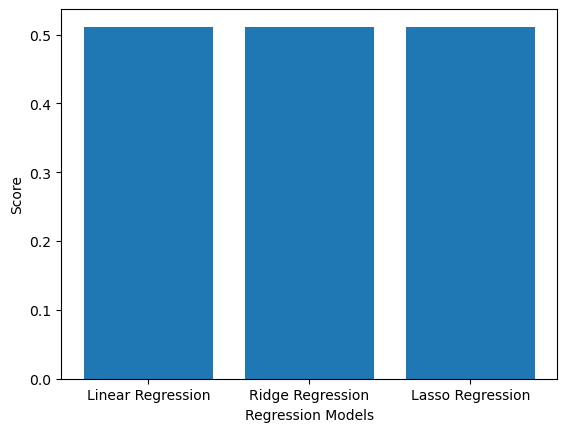

In [110]:
# Plotting the scores
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

### XG_Boost Model Prediction

In [111]:
# pip install xgboost
import xgboost

from xgboost import XGBRegressor

In [112]:
xgb_model=XGBRegressor()

xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [113]:
y_train_pred=xgb_model.predict(X_train)
y_test_pred=xgb_model.predict(X_test)

In [114]:
print("y_test_pred:",y_test_pred)
print("y_train_pred:",y_train_pred)

y_test_pred: [ 766.10406 1171.7843   972.4742  ...  365.18613 2119.0789  5303.108  ]
y_train_pred: [ 285.80954 1588.0072  3426.6694  ... 4584.978   1401.4363  1297.1976 ]


In [115]:
from sklearn.metrics import r2_score
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)


print("Training R-Squared  :" , train_r2)
print("Testing R-Squared  :" , test_r2)

Training R-Squared  : 0.8807823100636998
Testing R-Squared  : 0.5136482097483572


#### Hyperparameter tuning of XG Boost using GridSearch CV

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
parameters = {'min_samples_split':np.arange(2, 40,2),
              'max_depth': np.arange(2,10,2), 
              'alpha': [0.001,0.1,1, 10, 100, 1000, 10000],
#               'criterion':['gini', 'entropy']
             }

gs_model=GridSearchCV(XGBRegressor(),
                      param_grid=parameters,
                      scoring='accuracy',
                      cv=5,
                      n_jobs=20,
                      verbose=True)

gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 532 candidates, totalling 2660 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=20,
             param_grid={'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000],
                         'max_depth': array([2, 4, 6, 8]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38])},
             scoring='accuracy', verbose=True)

In [119]:
print(gs_model.best_params_)

{'alpha': 0.001, 'max_depth': 2, 'min_samples_split': 2}


In [120]:
parameters={'min_samples_split':[2],
           "max_depth":[2],
           "alpha":[0.001]}

ideal_xgb_model=GridSearchCV(XGBRegressor(),
                     param_grid=parameters,
                     cv=5,
                     verbose=True)

ideal_xgb_model.fit(X_train,y_train)



Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'alpha': [0.001], 'max_depth': [2],
                         'min_samples_split': [2]},
             verbose=True)

In [121]:
y_pred_train=ideal_xgb_model.predict(X_train)
y_pred_test=ideal_xgb_model.predict(X_test)

In [122]:
print("y_pred_test:",y_pred_test)
print("y_pred_train:",y_pred_train)

y_pred_test: [1107.9861   727.8206   679.7211  ...  211.69228 2158.76    4053.4663 ]
y_pred_train: [ 241.22885 1637.6226  3392.0283  ... 4175.138   1833.5093  1528.4368 ]


In [123]:
from sklearn.metrics import r2_score

In [124]:
r2_score_train=r2_score(y_train,y_pred_train)
r2_score_test=r2_score(y_test,y_pred_test)

In [125]:
print("r2 score on train data :", r2_score_train)
print("r2 score on test data :", r2_score_test)

r2 score on train data : 0.6301505061339908
r2 score on test data : 0.5962947549695226


## Prediction on Test Data

In [126]:
test_data=pd.read_csv("Test.csv")
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [127]:
test_data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [128]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [129]:
test_data.shape

(5681, 11)

In [130]:
test_data["Item_Weight"].mean()

12.695633368756642

In [131]:
test_data["Item_Weight"]=test_data["Item_Weight"].fillna(test_data["Item_Weight"].mean())

In [132]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [133]:
test_data["Outlet_Size"].isna()

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [134]:
test_data["Outlet_Size"].mode()[0]

'Medium'

In [135]:
test_data["Outlet_Size"]=test_data["Outlet_Size"].fillna(test_data["Outlet_Size"].mode()[0])

In [136]:
test_data["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
5676     Small
5677    Medium
5678    Medium
5679    Medium
5680    Medium
Name: Outlet_Size, Length: 5681, dtype: object

In [137]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Encoding of the test data

In [138]:
test_data["Item_Identifier"]=encoder.fit_transform(test_data["Item_Identifier"])
test_data["Item_Fat_Content"]=encoder.fit_transform(test_data["Item_Fat_Content"])
test_data["Item_Type"]=encoder.fit_transform(test_data["Item_Type"])
test_data["Outlet_Identifier"]=encoder.fit_transform(test_data["Outlet_Identifier"])
test_data["Outlet_Size"]=encoder.fit_transform(test_data["Outlet_Size"])
test_data["Outlet_Location_Type"]=encoder.fit_transform(test_data["Outlet_Location_Type"])
test_data["Outlet_Type"]=encoder.fit_transform(test_data["Outlet_Type"])

In [139]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


### Scaling of the test data for the better results

In [140]:
scale_columns=["Item_Identifier","Item_Weight","Item_Fat_Content","Item_Visibility","Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type"]
scaler=MinMaxScaler()
test_data[scale_columns]=scaler.fit_transform(test_data[scale_columns])

In [141]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.715305,0.964275,0.25,0.023374,0.866667,0.323413,1.000000,0.583333,0.5,0.0,0.333333
1,0.691958,0.222983,1.00,0.118737,0.266667,0.235849,0.222222,0.916667,0.5,0.5,0.333333
2,0.911803,0.598095,0.25,0.307674,0.733333,0.894140,0.000000,0.541667,0.5,1.0,0.000000
3,0.524643,0.164335,0.25,0.047548,0.866667,0.524488,0.222222,0.916667,0.5,0.5,0.333333
4,0.767834,0.484706,0.50,0.366458,0.266667,0.862069,0.555556,0.000000,0.5,1.0,1.000000


In [142]:
#dropping some features
test_data=test_data.drop("Item_Identifier", axis=1)
test_data=test_data.drop("Outlet_Identifier", axis=1)

In [143]:
test_data.shape

(5681, 9)

## Linear Regression Model Prediction on Test_Data

In [144]:
linear_model.predict(X_train)
print("Prediction values on training data:\n",linear_model.predict(X_train))

linear_model.predict(test_data)
print("Prediction values on test dataset:\n", linear_model.predict(test_data))

Prediction values on training data:
 [ 203.82399229 1611.57032934 3522.3548334  ... 3664.8975901  1722.75522985
 1498.73640752]
Prediction values on test dataset:
 [2094.9250096  1387.87555419 2260.87490498 ... 1779.50903928 3387.44391822
 1145.5278519 ]


## Regularised Linear Regression Model Prediction on Test_Data

* Ridge Regression

In [145]:
ridgeModelChosen.predict(X_train)
print("Prediction values on training data:\n",ridgeModelChosen.predict(X_train))

ridgeModelChosen.predict(test_data)
print("Prediction values on test data:\n",linear_model.predict(test_data))


Prediction values on training data:
 [ 216.31706076 1613.87720395 3516.96071101 ... 3658.70934875 1723.8712661
 1501.40248944]
Prediction values on test data:
 [2094.9250096  1387.87555419 2260.87490498 ... 1779.50903928 3387.44391822
 1145.5278519 ]


* Lasso Regression

In [146]:
lassoModelChosen.predict(X_train)
print("Prediction values on training data:\n",lassoModelChosen.predict(X_train))

lassoModelChosen.predict(test_data)
print("Prediction values on test data:\n",lassoModelChosen.predict(test_data))

Prediction values on training data:
 [ 232.56656766 1624.65115058 3529.43789828 ... 3653.70352604 1715.11089486
 1508.13931876]
Prediction values on test data:
 [2067.7770876  1369.94143595 2285.01809067 ... 1767.09366757 3372.07512193
 1140.1209729 ]


### XG Boost  Model Prediction on Test data

In [147]:
ideal_xgb_model.predict(X_train)
print("Prediction values on training data:\n",ideal_xgb_model.predict(X_train))

ideal_xgb_model.predict(test_data)
print("Prediction values on test data:\n",ideal_xgb_model.predict(test_data))

Prediction values on training data:
 [ 241.22885 1637.6226  3392.0283  ... 4175.138   1833.5093  1528.4368 ]
Prediction values on test data:
 [1517.6377  1533.0164   875.67834 ... 1887.2031  3441.2905  1039.9652 ]


### Random Forest Model Prediction on Test data

In [148]:
grid={'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 11,
 'max_samples': 1500,
 'max_features': 1.0,
 'max_depth': 5}

ideal_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=30,
                              cv=5,
                              verbose=True)

ideal_model.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [1500],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [149]:
ideal_model.predict(X_train)
print("Prediction values on the training data",ideal_model.predict(X_train))

ideal_model.predict(test_data)
print("Presiction values on the test data",ideal_model.predict(test_data))

Prediction values on the training data [ 252.98291174 1584.71231914 3245.42139353 ... 3980.69292407 1920.05993102
 1509.80004271]
Presiction values on the test data [1625.78347323 1411.75057943  562.05083517 ... 1944.43808735 3558.86852982
 1281.09517299]


## Saving the model using pickle library

In [150]:
import pickle
# save the model to disk
filename = 'bigmartsales_model.sav'
# in the following code, I am saving random forest model in a file named "finalized_model.sav"
pickle.dump(ideal_model, open(filename, 'wb'))

## Summary of the whole notebook

So from this project we conclude that a smart sales forecasting program is required to manage vast volumes of knowledge for business organizations. 
The Algorithms which are presented in this report , LR, RF regression,and XGBoost regression provide an effective method for data sharing as well as decision-makingand also provide new approaches that are used for better identifying consumer needs and formulate marketing plans that are going to be implemented. 
The outcomes of ML algorithms which are done in this project will help us to pick the foremost suitable demand prediction algorithm and with the aid of which BigMart will prepareits marketing campaigns.